In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('social_media_data.csv')
df

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0
...,...,...,...,...,...,...,...
1995,2023-01-15,Facebook,video,2039.0,523.0,371.0,4780.0
1996,2022-11-13,Twitter,image,1652.0,891.0,410.0,8741.0
1997,2023-09-18,Twitter,video,528.0,207.0,341.0,6588.0
1998,2023-04-23,Facebook,video,1288.0,893.0,328.0,8349.0


In [4]:
df['date'] = pd.to_datetime(df['date'])
df

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0
...,...,...,...,...,...,...,...
1995,2023-01-15,Facebook,video,2039.0,523.0,371.0,4780.0
1996,2022-11-13,Twitter,image,1652.0,891.0,410.0,8741.0
1997,2023-09-18,Twitter,video,528.0,207.0,341.0,6588.0
1998,2023-04-23,Facebook,video,1288.0,893.0,328.0,8349.0


In [5]:
df.platform.unique()

array(['Twitter', 'Instagram', 'Facebook', 'NonExistingPlatform'],
      dtype=object)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

date          0
platform      0
post_type     0
likes         8
shares        8
comments      8
views        10
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2000 non-null   datetime64[ns]
 1   platform   2000 non-null   object        
 2   post_type  2000 non-null   object        
 3   likes      1992 non-null   float64       
 4   shares     1992 non-null   float64       
 5   comments   1992 non-null   float64       
 6   views      1990 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 109.5+ KB


In [9]:
df.post_type.unique()

array(['image', 'text', 'video'], dtype=object)

In [10]:
df['year'] = df.date.dt.year

# Questions

## 1.What was the total number of likes, shares, comments, and views (for videos) over the year?

In [11]:
df_1 = df[df['post_type'] == 'video'].groupby('year')[['likes', 'comments', 'shares', 'views']].sum().reset_index()
df_1

,year,likes,comments,shares,views
0,2022,180851.0,44278.0,75537.0,1017825.0
1,2023,635319.0,149861.0,235503.0,3446906.0


## 2.Which platform had the highest engagement? (engagement = likes + shares + comments)

In [12]:
df['engagement'] = df.likes + df.shares + df.comments

In [13]:
df_2 = df.groupby('platform')['engagement'].sum().sort_values(ascending=False).reset_index()
df_2

,platform,engagement
0,Instagram,1405244.0
1,Twitter,1402022.0
2,Facebook,1316833.0
3,NonExistingPlatform,11709.0


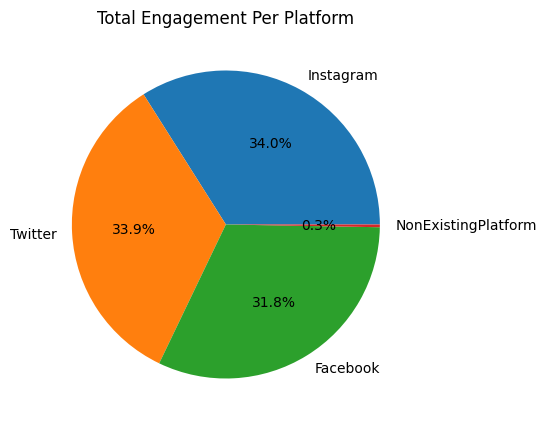

In [14]:
plt.figure(figsize=(12, 5))
plt.pie(df_2['engagement'], labels=df_2['platform'], autopct='%1.1f%%')
plt.title('Total Engagement Per Platform')
plt.show()

## 3.What was the average number of likes, shares, comments, and views per post on each platform?

In [15]:
df_3 = df.groupby('platform')[['likes', 'shares', 'comments', 'views']].mean().reset_index()
df_3

,platform,likes,shares,comments,views
0,Facebook,1289.982428,513.141494,311.160317,6984.239234
1,Instagram,1305.837278,497.372404,301.046062,6905.875556
2,NonExistingPlatform,1150.166667,515.833333,285.500000,6729.166667
3,Twitter,1274.994152,482.437775,305.857980,7013.258065


## 4.What was the total number of each type of post (video, image, text) on each platform?

In [36]:
df_4 = df.groupby(['platform', 'post_type'])['post_type'].count()
df_4 = pd.DataFrame(df_4)
df_4 = df_4.rename(columns={'post_type':'count'}).reset_index()
df_4

,platform,post_type,count
0,Facebook,image,218
1,Facebook,text,204
2,Facebook,video,209
3,Instagram,image,267
4,Instagram,text,203
5,Instagram,video,208
6,NonExistingPlatform,image,1
7,NonExistingPlatform,text,3
8,NonExistingPlatform,video,2
9,Twitter,image,249


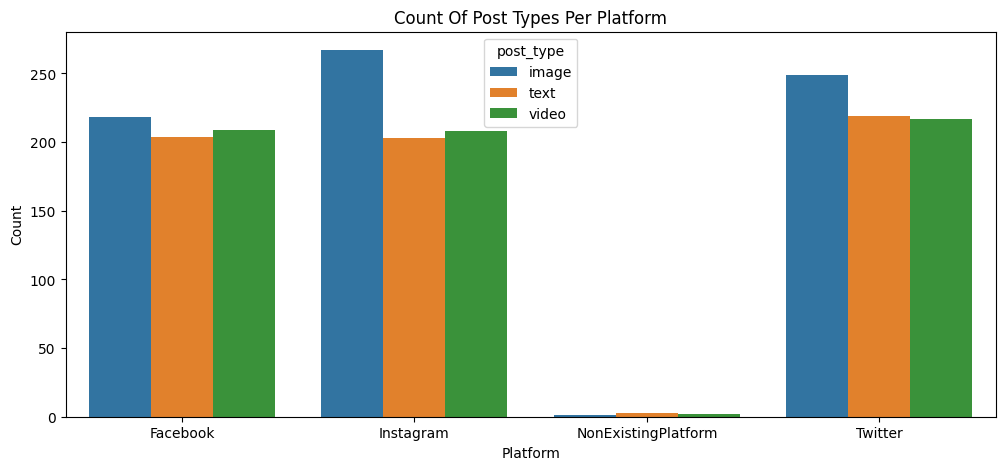

In [37]:
plt.figure(figsize=(12, 5))
sns.barplot(df_4, x='platform', y='count', hue='post_type')
plt.title('Count Of Post Types Per Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

## 5.Which type of post had the highest average engagement?

In [18]:
df_5 = df.groupby('post_type')['engagement'].sum().sort_values(ascending=False).reset_index()
df_5

,post_type,engagement
0,image,1510201.0
1,text,1315439.0
2,video,1310168.0


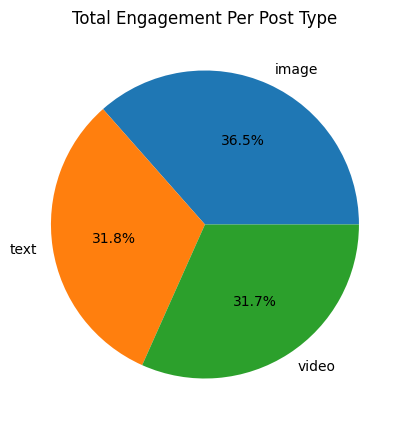

In [19]:
plt.figure(figsize=(12, 5))
plt.pie(df_5['engagement'], labels=df_5['post_type'], autopct='%1.1f%%')
plt.title('Total Engagement Per Post Type')
plt.show()

## 6.What was the total engagement in each quarter of the year?

In [20]:
df['quarter'] = df.date.dt.quarter

In [21]:
df_6 = df[df['year'] == 2023].groupby('quarter')['engagement'].sum().sort_values(ascending=False).reset_index()
df_6

,quarter,engagement
0,1,1025381.0
1,2,1000644.0
2,3,978372.0
3,4,192516.0


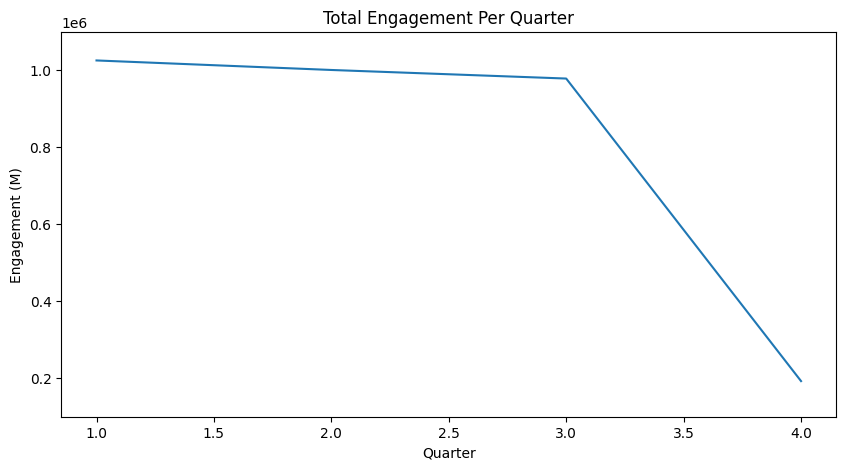

In [22]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_6, x='quarter', y='engagement')
plt.title('Total Engagement Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Engagement (M)')
plt.ylim(100000, 1100000)
plt.show()